<a href="https://colab.research.google.com/github/bidhan7/Data-Processing-Visualization-/blob/main/Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam 1
# Bidhan Subedi
# Data Visualization (CPSMA 4313)


In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
#for authentication
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


#### References

https://en.wikipedia.org/wiki/List_of_mountains_by_elevation

https://github.com/nurfnick/Data_Viz

https://github.com/bidhan7/Data-Processing-Visualization-

https://bramtunggala.medium.com/5-number-summary-with-python-8aad81863b73

https://www.pythonprogramming.in/find-mean-median-and-mode-of-dataframe-in-pandas.html

“I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course.”

## Gathering the table on 8000 km mountains from the wikipedia page of mountains by elevation

#### Storing the data as a pandas dataframe

In [ ]:
dataframe= pd.read_html('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')[0]
dataframe

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


#### Returning only mountains in the ‘Himalayas’ Range

In [ ]:
dataframe[dataframe.Range == 'Himalayas']

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


#### Barchart of the Ranges
First I will count how many Himalayas and Karakoram Range are there and use .groupby and set value to range_count. Then I will plot barchart of the Ranges.

In [ ]:
range_count= dataframe.groupby('Range').count()
range_count

,Mountain,Metres,Feet,Location and Notes
Range,,,,
Himalayas,10,10,10,10
Karakoram,4,4,4,4


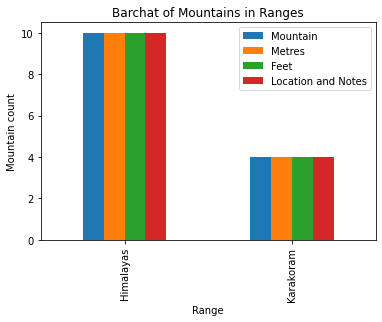

In [ ]:
range_count.plot(kind ='bar',title = 'Barchat of Mountains in Ranges', ylabel = 'Mountain count')

####  Creating a box-plot of the height in Feet

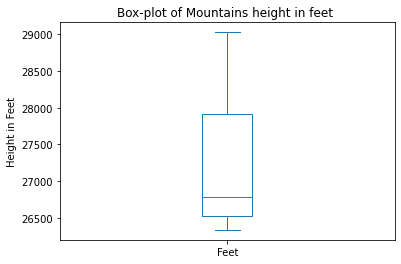

In [ ]:
dataframe.Feet.plot(kind ='box', title = 'Box-plot of Mountains height in feet ', ylabel = 'Height in Feet')

In [ ]:
import numpy as np

#### Finding the mean, standard deviation and five number summary of the height in Feet 
As we are using pandas library, .describe finds mean, SD and 5 number summary.

In [ ]:
dataframe.Feet.describe()

count       14.000000
mean     27178.000000
std        879.489537
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29029.000000
Name: Feet, dtype: float64

#### Mean and Median of mountains when grouped by their Range.

In [ ]:
mean=dataframe.groupby('Range').mean()
mean

,Metres,Feet
Range,,
Himalayas,8319.70,27295.6
Karakoram,8194.25,26884.0


In [ ]:
median=dataframe.groupby('Range').median()
median

,Metres,Feet
Range,,
Himalayas,8177.5,26829.5
Karakoram,8065.5,26461.5


## Using BigQuery public dataset ‘chicago taxi trips.taxi trips’ using the Colab and SQL interface.


####  Finding total rows are in the dataset

In [ ]:
%%bigquery --project data-visualization-338723
SELECT COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_rows
0,198792903


#### Finding the average trip total based on payment type

In [ ]:
%%bigquery --project data-visualization-338723
SELECT payment_type, 
  AVG(trip_total) as Average_total_trip_cost
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE payment_type is not null
GROUP BY payment_type

,payment_type,Average_total_trip_cost
0,Dispute,15.496588
1,Pcard,10.116931
2,Credit Card,20.524892
3,Prcard,20.320682
4,Unknown,17.649893
5,Mobile,20.339910
6,No Charge,15.836177
7,Way2ride,16.639366
8,Split,18.788039
9,Cash,12.265548


#### How many trips, that had a non-zero recorded time, were above the average time?
First finding the average time

In [ ]:
%%bigquery --project data-visualization-338723
SELECT AVG(trip_seconds) as avg_seconds 
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,avg_seconds
0,792.717188


In [ ]:
%%bigquery --project data-visualization-338723
SELECT COUNT(*) as None_zero_no_of_trips_above_avg_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds !=0 AND trip_seconds > (SELECT AVG(trip_seconds) as avg_seconds FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)

,None_zero_no_of_trips_above_avg_time
0,62143014



(a) Approximately how long did you work on this exam?

    On and off it took me approximately 3-4 hours in total.

(b) Which was the hardest and easiest topic from this section?
    
    The hardest topic is " How many trips, that had a non-zero recorded time, were above the average time?" and the easiest topic is "How many total rows are in the dataset."

(c) Which method of gathering data are you most excited to use again?

    Python and Pandas method of gathering data is that i am excited to use again.

